# Introduction
## Boston Marathon project
- There is a lot of information on runners and their performance for the
Boston Marathon. Pick a year (post-2012 has more info) and do some
clustering.
- Specifically, use the tools at hand to determine which clustering
solution, including number of clusters and algorithm used, is best for
the marathon data. Once you have a solution you like, write a data
story, including visualizations, where you teach the reader something
about the Boston Marathon based on your clusters. Write up your
report, including your process from start to finish. You must include
analysis as:
    - 1. Draw bar graphs (both male & female in different color) for each
cluster for male and female, from the bar graphs, you can tell things
as which cluster contains the most number of female (or male).
    - 2. Draw bar graphs for runners in different ranges of age (dividing by 3
groups: 18-25, 26-40, 40-70 or so) for each cluster (in different colors),
from the graph, you should be able to anwser which cluster contains
the most young people, which cluster contains oldest people, etc.
    - 3. Do the same things as above for finishing time (which group runs
fastest)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# 1. EDA

In [2]:
data = pd.read_csv('D:/machine learning/project/Boston_marathon/results.csv')
data.shape

(31984, 21)

In [3]:
data.head(10)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,...,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,...,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,...,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,...,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,...,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


In [4]:
data.tail(10)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
31974,76.45,"Foley, Alison M.",6973,-,F,29,431.73,35903,14339,NaN,...,31887,15.52,MA,279.47,35.63,183.28,166.43,USA,Wellesley,-
31975,75.80,"Casey, Patrick A. Jr.",2897,-,M,45,385.13,35904,17389,NaN,...,31517,14.70,MA,268.23,37.72,170.82,162.13,USA,Weymouth,366.37
31976,63.95,"Lyons, Paul J. Jr.",4993,161.75,M,33,288.85,35905,14730,NaN,...,25975,11.03,MA,200.45,31.60,135.50,128.43,USA,Hyde Park,275.02
31977,63.33,"Vinal, George R. Jr.",5217,165.40,M,37,302.93,35906,15472,NaN,...,27490,11.57,MA,208.53,29.82,136.98,130.45,USA,Boston,286.62
31978,76.75,"Morris, David",2598,210.07,M,44,374.22,35907,17288,NaN,...,31296,14.28,MA,257.60,37.10,173.45,163.78,USA,Wayland,352.18
31979,50.72,"Anderson, Steve K.",3414,124.02,M,32,211.75,35908,7500,NaN,...,9849,8.08,CA,148.65,26.13,104.78,99.55,USA,Larkspur,200.22
31980,61.28,"McCarthy, Michael P.",5212,165.02,M,34,302.52,35909,15459,NaN,...,27456,11.55,MA,203.43,31.07,135.85,128.37,USA,Norwell,285.47
31981,59.00,"Brimmer, Delia C.",5231,157.02,F,21,282.00,35910,10788,NaN,...,25092,10.77,CT,192.65,28.18,130.57,123.33,USA,West Simsbury,266.30
31982,63.75,"Morganthal, Amy",5800,167.82,F,38,302.73,35911,12009,NaN,...,27476,11.55,MA,207.52,30.98,137.03,129.90,USA,North Andover,285.87
31983,53.63,"Kirchner, Jeffrey T.",1396,135.02,M,54,228.30,35912,9771,NaN,...,14844,8.72,PA,161.83,26.92,114.13,108.03,USA,Lancaster,216.48


In [5]:
data.describe(percentiles=[.1,.25,.50,.75,.95,.99])

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
10%,215.000000,27.000000,184.600000,1573.300000,3146.300000,7.050000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
95%,5645.850000,62.000000,344.095500,15975.850000,30331.850000,13.130000
99%,6659.170000,68.000000,390.930200,17255.170000,31611.170000,14.920000


In [6]:
data.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


## Variables Description:
- name: runner's name => categorical variable
- division: runner's rank in their division => categorical variable. Some divisions such as: Men's Wheelchair, Women's Wheelchair, Elite Men, Elite Women, Pare Athletics Divisions,...
- gender: runner's gender => categorical variable
- age: age of runner on race day => numerical variable
- official: Runner's official finishing time in minute => numerical variable
- bib: Runner's bib number. Bib numbers are color coded. Red bibs (numbers 101 to 7,700) are assigned to Wave 1 (10:00 a.m.). White bibs (numbers 8,000 to 15,600) are assigned to Wave 2 (10:25 a.m.). Blue bibs (numbers 16,000 to 23,600) are assigned to Wave 3 (10:50 a.m.) Yellow bibs (numbers 24,000 to 32,500) are assigned to Wave 4 (11:15 a.m.). "F" could appear for female elites => categorical variable
- genderdiv: runner's rank in their gender division => categorical variable
- ctz: Runner's nationality => categorical variable
- overall: overall rank of runner => categorical variable
- pace: Runner's overall minute for each distance (being a measure of time taken to run a given distance) (in minutes) => numerical variable
- state: Runner's state of residence  => categorical variable
- country: Runner's country of residence => categorical variable
- city: Runner's city of residence => categorical variable
- 10k,25k,35k,30k,5k,half,20k,40k: Runner's time at 10km,25km,..., halfway point,.... respectively  in minutes => numerical variable


## Phan loai numerical and categorical features

In [8]:
# Xoa cot name va bib vi cac gia tri o 2 cot nay la duy nhat cho moi runner nen khong dua vao phan tich du lieu
data_trans = data.drop(['name','bib'], axis=1)

In [9]:
cat_var = ['division','gender','genderdiv','ctz', 'overall','state','country','city']
num_var = [c for c in data_trans.columns if c not in cat_var]

In [10]:
print(num_var)

['10k', '25k', 'age', 'official', '35k', 'pace', '30k', '5k', 'half', '20k', '40k']


In [11]:
# chuyen doi cac feature 10k,25k,35k,30k,5k,half,20k,40k thanh kieu float:
# 1. thay the cac gia tri '-' bang nan
data_trans.replace('-', np.nan, inplace=True, regex=True)
# 2. convert to numeric
data_trans[num_var] = data_trans[num_var].astype(float)

In [12]:
# chuyen doi cac 'division','genderdiv','overall' thanh kieu object:
data_trans[cat_var] = data_trans[cat_var].astype(object)

## Phan tich numerical features

In [13]:
data_trans[num_var].head()

,10k,25k,age,official,35k,pace,30k,5k,half,20k,40k
0,17.37,47.67,47.0,85.25,71.40,3.27,59.18,8.02,39.72,37.65,80.43
1,32.58,82.43,33.0,138.95,116.37,5.30,99.33,16.22,69.47,65.83,132.10
2,16.62,45.80,41.0,80.60,67.42,3.08,56.45,7.75,38.03,36.10,76.10
3,32.57,82.43,24.0,140.58,116.37,5.37,99.33,16.20,69.47,65.83,132.95
4,17.12,46.37,40.0,81.23,67.83,3.10,57.03,8.02,38.60,36.58,76.72


In [14]:
data_trans[num_var].describe(percentiles=[.1,.25,.50,.75,.95,.99])

,10k,25k,age,official,35k,pace,30k,5k,half,20k,40k
count,31934.000000,31768.000000,31984.000000,31984.000000,31950.000000,31984.000000,31944.000000,31932.000000,31912.000000,31933.000000,31945.000000
mean,51.799275,133.612055,42.407079,242.997314,196.857605,9.275658,164.571219,25.755559,111.664566,105.711669,229.001490
std,8.965513,25.596958,11.316496,52.300431,41.979107,1.992486,33.953683,4.327830,21.061188,19.780525,49.159902
min,16.620000,45.800000,18.000000,80.600000,67.420000,3.080000,56.450000,7.750000,38.030000,36.100000,76.100000
10%,41.670000,105.080000,27.000000,184.600000,150.520000,7.050000,127.350000,20.870000,88.370000,83.780000,174.080000
25%,45.400000,115.470000,33.000000,205.527500,167.122500,7.850000,140.670000,22.650000,96.845000,91.750000,193.820000
50%,50.330000,128.875000,42.000000,232.370000,188.170000,8.870000,157.730000,25.080000,107.830000,102.150000,218.850000
75%,57.170000,147.735000,50.000000,273.235000,220.170000,10.430000,182.880000,28.470000,123.070000,116.520000,257.450000
95%,68.180000,183.680000,62.000000,344.095500,279.170000,13.130000,230.914000,33.370000,151.748000,143.400000,324.574000
99%,76.826700,206.336600,68.000000,390.930200,319.262800,14.920000,265.991400,37.350000,173.924500,164.120000,367.570000


### ve bieu do phan phoi

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002298C2F2CF8>,
      dtype=object)

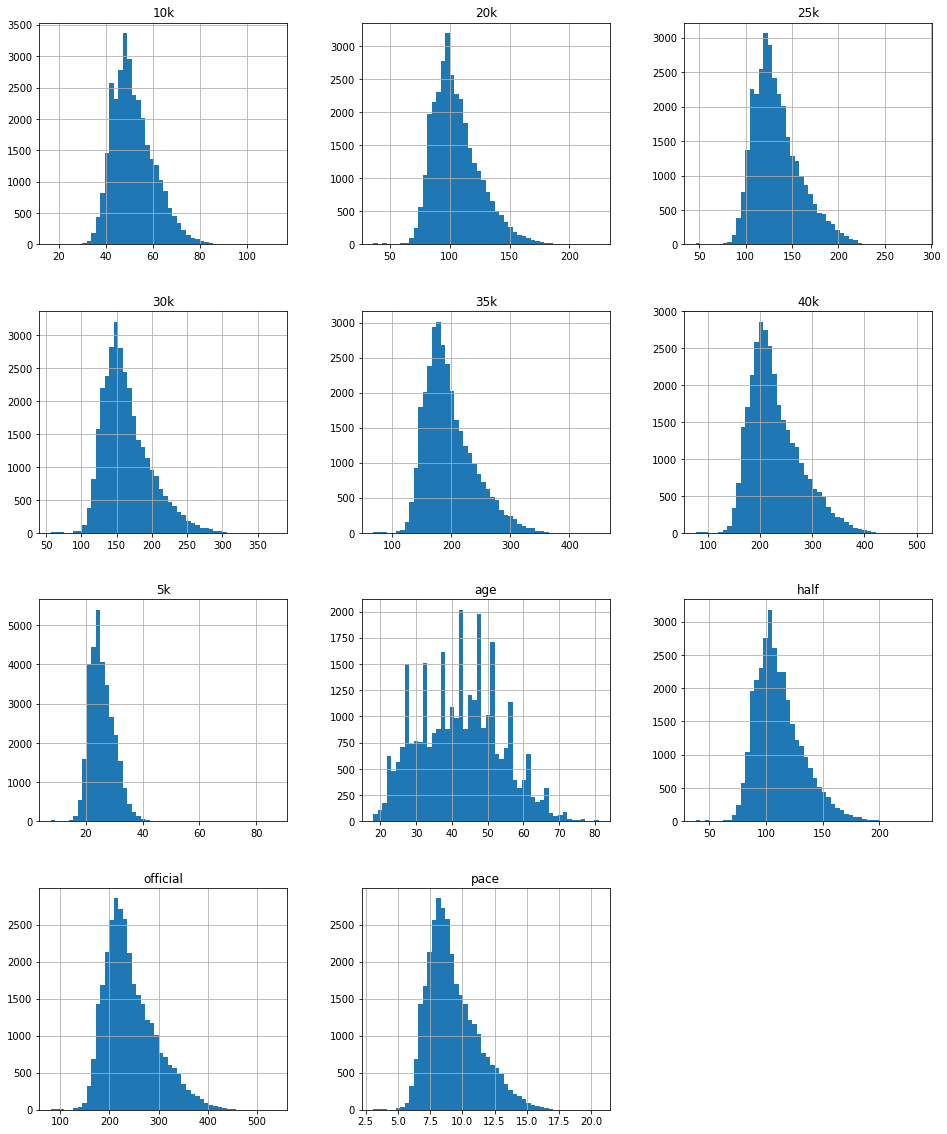

In [15]:
data_trans[num_var].hist(figsize=(16, 20), bins=50)

## Phan tich categorical features

In [16]:
data_trans[cat_var].head()

,division,gender,genderdiv,ctz,overall,state,country,city
0,8,M,8,NaN,8,NaN,JPN,Fukuoka
1,1,F,1,NaN,21,NaN,KEN,Eldoret
2,1,M,1,NaN,1,NaN,RSA,Paarl
3,3,F,3,NaN,27,NaN,ETH,Shoa
4,2,M,2,NaN,2,NaN,JPN,Nogata Fukuoka


In [17]:
data_trans[cat_var].describe()

,division,gender,genderdiv,ctz,overall,state,country,city
count,31984,31984,31984,1244,31984,29408,31984,31783
unique,6979,2,17575,84,31931,68,78,5790
top,1,M,1,GBR,1,MA,USA,Boston
freq,23,17617,4,171,2,7587,27233,1034


In [18]:
# xem cac tan suat cac gia tri cua cac cot
for catg in cat_var:
    print(data_trans[catg].value_counts())
    print('#'*50)

1       23
2       22
3       22
4       21
5       20
6       20
7       20
8       20
9       19
10      19
11      19
16      18
19      18
18      18
17      18
20      18
15      18
13      18
12      18
14      18
30      17
38      17
37      17
36      17
35      17
34      17
33      17
32      17
31      17
28      17
        ..
6247     1
6248     1
6249     1
6250     1
6251     1
6252     1
6253     1
6254     1
6255     1
6256     1
6257     1
6258     1
6259     1
6260     1
6261     1
6262     1
6263     1
6264     1
6265     1
6266     1
6267     1
6268     1
6269     1
6270     1
6271     1
6272     1
6273     1
6274     1
6275     1
6979     1
Name: division, Length: 6979, dtype: int64
##################################################
M    17617
F    14367
Name: gender, dtype: int64
##################################################
1        4
6        4
11       4
10       4
8        4
7        4
9        4
5        4
4        4
3        4
2        4
35       3
29 

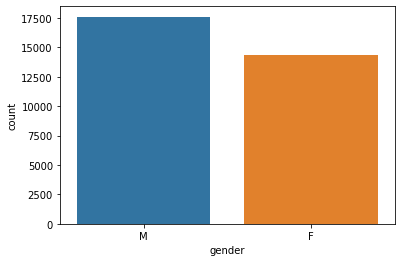

In [19]:
# ve bieu do cho cot gender, cac cot con lai co gia tri phan tan lon nen khong ve bieu do
sns.countplot(data_trans['gender'])

So luong nam tham gia cuoc thi nhieu hon nu

## Check and treat missing value

In [20]:
total = data_trans.isnull().sum()
percent = data_trans.isnull().sum()/len(data)*100
missing_data = pd.concat([total,percent], axis=1,keys=['Total', 'Percent'])
missing_data

,Total,Percent
10k,50,0.156328
division,0,0.000000
25k,216,0.675338
gender,0,0.000000
age,0,0.000000
official,0,0.000000
genderdiv,0,0.000000
ctz,30740,96.110555
35k,34,0.106303
overall,0,0.000000


In [21]:
# vi cot ctz co % missing value rat lon nen ta loai bo cot nay
data_trans.drop(['ctz'], axis = 1, inplace = True)
cat_var.remove('ctz')
# thay the cac Nan trong state bang unknown
data_trans['state'].replace(np.nan, 'unknown', inplace=True, regex=True)

In [22]:
# cac feature con lai co % missing value rat nho len ta drop het cac gia tri NaN nay
data_trans.dropna(inplace = True)

In [23]:
data_trans.isnull().sum().sum()

0

In [24]:
data_trans.shape

(31449, 18)

In [25]:
# % du lieu con lai so voi du lieu ban dau
data_trans.shape[0]/data.shape[0]*100

98.32728864432217

## Relation of numerical features to finishing time

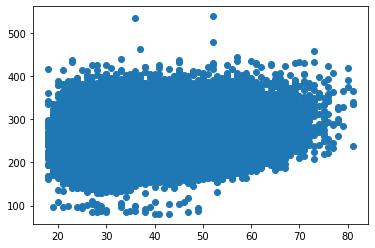

In [27]:
plt.scatter(data_trans['age'],data_trans['official'],label='relation of age and official')

Nhung nguoi o do tuoi khoang tu 18-40 co thoi gian hoan thanh som nhat

## Relation of Categorical features to finishing time

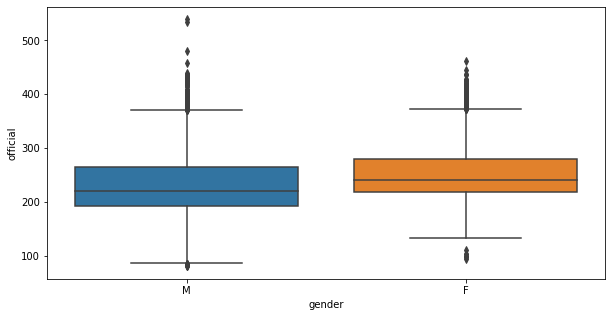

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x='gender', y='official', data=data_trans)

Thoi gian trung binh hoan thanh cuoc dua cua nam nho hon cua nu

## Xu ly outlier

In [29]:
dataset = data_trans

In [30]:
q1 = dataset.quantile(0.25)
q3 = dataset.quantile(0.75)
iqr = q3 - q1
dataset = dataset[~((dataset < (q1 - 1.5 * iqr)) |(dataset > (q3 + 1.5 * iqr)))]
total = dataset.isnull().sum()
percent = dataset.isnull().sum()/len(dataset)*100
missing_dataset = pd.concat([total,percent], axis=1,keys=['Total', 'Percent'])
missing_dataset

,Total,Percent
10k,386,1.227384
division,0,0.000000
25k,729,2.318039
gender,0,0.000000
age,35,0.111291
official,513,1.631212
genderdiv,0,0.000000
35k,665,2.114535
overall,0,0.000000
pace,494,1.570797


In [31]:
# vi ti le cac gia tri missing value xuat hien sau khi xu ly outlier rat nho nen ta xoa cac dong missing value
dataset = dataset.dropna()

In [32]:
dataset.isnull().sum().sum()

0

In [33]:
print(dataset.shape)
# % du lieu con lai so voi du lieu ban dau
dataset.shape[0]/data.shape[0]*100

(30424, 18)


95.12256128064031

In [34]:
dataset.describe(percentiles=[.1,.25,.50,.75,.95,.99])

,10k,25k,age,official,35k,pace,30k,5k,half,20k,40k
count,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000
mean,51.046054,131.609369,42.297923,238.148918,192.868566,9.091420,161.327737,25.415469,109.690817,103.893199,224.558834
std,7.869989,22.606950,11.186563,45.511190,36.174294,1.735893,29.065214,3.830616,18.035240,17.030435,42.936809
min,30.480000,76.000000,18.000000,128.620000,106.620000,4.920000,91.170000,15.150000,64.350000,61.080000,121.820000
10%,41.620000,104.930000,27.000000,184.120000,150.220000,7.030000,127.180000,20.820000,88.250000,83.650000,173.700000
25%,45.200000,115.020000,33.000000,204.627500,166.400000,7.820000,140.050000,22.550000,96.420000,91.345000,192.980000
50%,50.010000,128.020000,42.000000,230.350000,186.500000,8.800000,156.380000,24.920000,107.030000,101.390000,216.990000
75%,56.220000,145.422500,50.000000,267.600000,215.520000,10.220000,179.155000,28.020000,120.920000,114.520000,252.105000
95%,65.400000,174.917000,61.000000,326.317000,262.914000,12.450000,217.997000,32.230000,143.728500,135.950000,307.597000
99%,70.080000,188.927700,67.000000,349.950000,283.820000,13.350000,235.395400,34.530000,154.550000,146.295400,330.727700


# 2. Cluster

- K-means: clustering gender
- K-modes: clustering age
- K-prototypes: clustering finishing time

## 2.1 K-means

### Clustering gender

In [47]:
Xnum = dataset[['age','pace']]
Xnum.columns

Index(['age', 'pace'], dtype='object')

In [48]:
X_means = MinMaxScaler().fit_transform(Xnum)

### Su dung phuong phap elbow method de chon so cluster toi uu

Text(0, 0.5, 'Inertia')

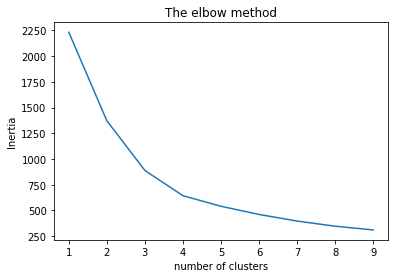

In [50]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_means)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,10), inertia)
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')

In [39]:
# Chon cluster = 4
cluster_means = 4

Training the K-means model

In [40]:
kmeans = KMeans(n_clusters = cluster_means, random_state = 42)
y_means = kmeans.fit_predict(X_means)

In [41]:
dataset['cluster_kmeans'] = y_means

In [42]:
gender = pd.DataFrame(columns=['M', 'F'])
gender.loc['cluster_0'] = dataset[dataset['cluster_kmeans']==0].groupby('gender').count()['cluster_kmeans']
gender.loc['cluster_1'] = dataset[dataset['cluster_kmeans']==1].groupby('gender').count()['cluster_kmeans']
gender.loc['cluster_2'] = dataset[dataset['cluster_kmeans']==2].groupby('gender').count()['cluster_kmeans']
gender.loc['cluster_3'] = dataset[dataset['cluster_kmeans']==3].groupby('gender').count()['cluster_kmeans']
gender

,M,F
cluster_0,2192,3202
cluster_1,6892,4127
cluster_2,4467,4046
cluster_3,3328,2170


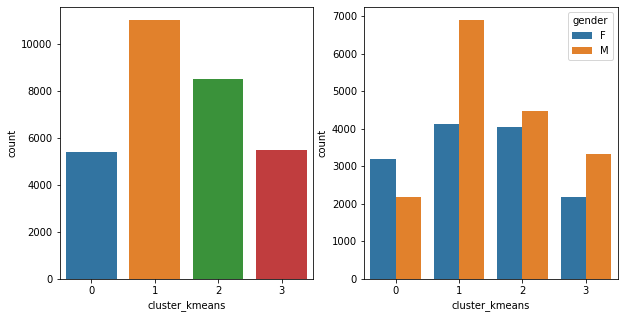

In [43]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(dataset['cluster_kmeans'])
plt.subplot(1, 2, 2)
sns.countplot(x='cluster_kmeans',hue='gender', data = dataset)

### Nhan xet:
- tu cac bieu do cluster 1 co so luong runner nhieu nhat, cluster 0,3 co so luong runner it nhat
- Nhom cluster 1,2 co nhieu female nhat, nhom cluster 1 co nhieu male nhat

Text(0.5, 1.0, 'age by cluster number')

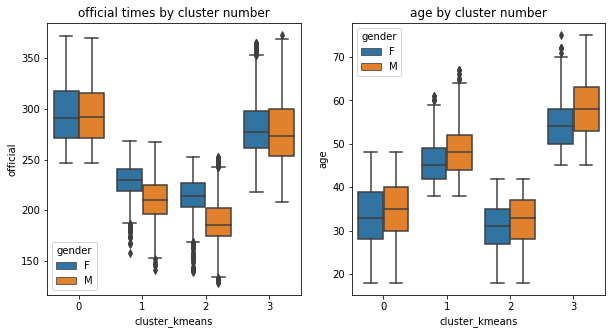

In [44]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='cluster_kmeans', y='official', hue='gender', data=dataset)
plt.title('{} times by cluster number'.format('official'))
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_kmeans', y='age', hue='gender', data=dataset)
plt.title('{} by cluster number'.format('age'))

### Nhan xet:
- Do tuoi trung binh cua cac female nho hon male o tat ca cac cluster.
- Nhom cluster 1,2 va 3: thoi gian trung binh hoan thanh cuoc dua cua female lon hon male (tuc female chay cham hon male)

### Performance

In [45]:
from sklearn.metrics import silhouette_score

In [46]:
score = silhouette_score(X_means, y_means)
print("For n_clusters = {}, silhouette score is {})".format(cluster_means, score))

For n_clusters = 4, silhouette score is 0.3786139346139413)


# 2.2.K-modes

In [35]:
from kmodes.kmodes import KModes

### Clustering age

In [36]:
# chia cac nhom tuoi
def age_group(age):
    if age >=18 and age <=25:
        return '18-25'
    elif age >25 and age <=40:
        return '26-40'
    elif age >40 and age <=70:
        return '41-70'
    else:
        return '> 70'
dataset['age'] = dataset['age'].astype(int)
dataset['age_group'] = dataset['age'].apply(age_group)

In [37]:
dataset['age_group'].value_counts()

41-70    16947
26-40    11426
18-25     1932
> 70       119
Name: age_group, dtype: int64

In [38]:
Xcat = dataset[['gender','country','city']]
Xcat.columns

Index(['gender', 'country', 'city'], dtype='object')

Text(0, 0.5, 'cost')

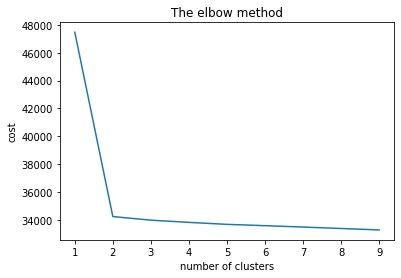

In [39]:
cost = []
for i in range(1,10):
    kmodes = KModes(n_clusters = i, n_jobs = -1, n_init = 5)
    kmodes.fit(Xcat)
    cost.append(kmodes.cost_)
plt.plot(range(1,10), cost)
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('cost')    

In [40]:
# chon cluster
cluster_kmodes = 2

In [41]:
kmodes = KModes(n_clusters = cluster_kmodes, n_jobs = -1, n_init = 5)
y_modes = kmodes.fit_predict(Xcat)

In [42]:
dataset['cluster_kmodes'] = y_modes

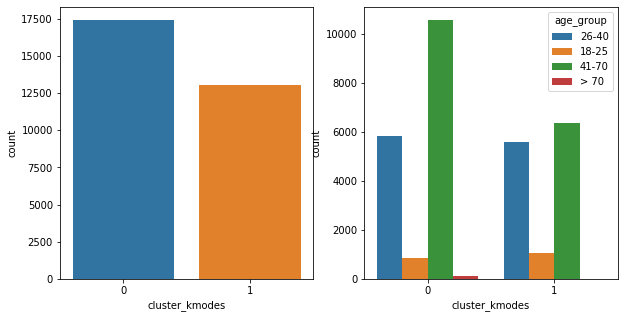

In [43]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(dataset['cluster_kmodes'])
plt.subplot(1, 2, 2)
sns.countplot(x='cluster_kmodes',hue='age_group', data = dataset)

In [47]:
age_group = pd.DataFrame(columns=['18-25', '26-40','41-70','> 70'])
age_group.loc['cluster_0'] = dataset[dataset['cluster_kmodes']==0].groupby('age_group').count()['cluster_kmodes']
age_group.loc['cluster_1'] = dataset[dataset['cluster_kmodes']==1].groupby('age_group').count()['cluster_kmodes']
# age_group.loc['cluster_3'] = dataset[dataset['cluster_kmodes']==2].groupby('age_group').count()['cluster_kmodes']
age_group

,18-25,26-40,41-70,> 70
cluster_0,869,5848,10584,112
cluster_1,1063,5578,6363,7


### Nhan xet
- Tu bieu do tren ta thay cluster 0 co so luong nhieu nhat
- Cluster 1 co nhieu nguoi tre tuoi nhat, cluster 0 co nhieu nguoi lon tuoi nhat

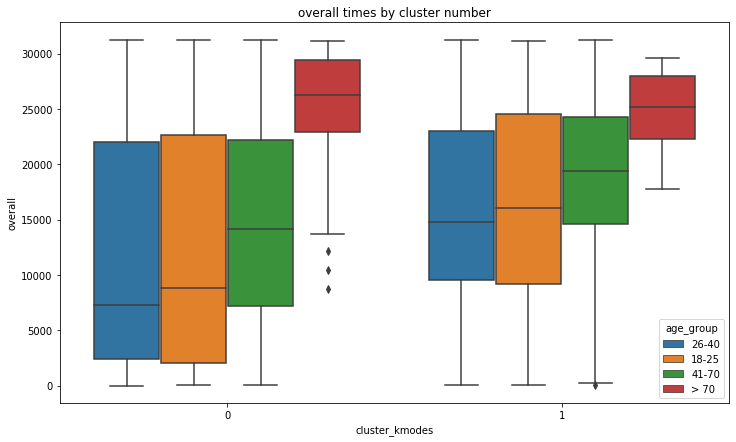

In [46]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='cluster_kmodes', y='overall', hue='age_group', data=dataset)
plt.title('{} times by cluster number'.format('overall'))

plt.show()

### Nhan xet
- Nhom cluster 0 co trung binh xep hang cao nhat
- Nguoi o do tuoi 26-40 co trung binh xep hang cao nhat o tat ca cac cluster
- So luong nguoi o do tuoi > 70 thi trung binh xep hang la thap nhat o tat cac nhom cluster 

### Performance

In [48]:
le = preprocessing.LabelEncoder()
Xcat = Xcat.apply(le.fit_transform)

In [49]:
score = silhouette_score(Xcat, y_modes, metric='hamming')
print("For n_clusters = {}, silhouette score is {})".format(cluster_kmodes, score))

For n_clusters = 2, silhouette score is 0.4196874841521435)


# 2.3. K-prototype

In [50]:
from kmodes.kprototypes import KPrototypes

### Clustering finishing time

In [66]:
# chon cac feature de clustering
X_cat = dataset[['gender','country','state']]
X_num = dataset[['age', 'pace']]
X_kp = dataset[['gender','country','state','age', 'pace' ]]

In [68]:
dnumcolums = [0,1,2]

Text(0, 0.5, 'cost')

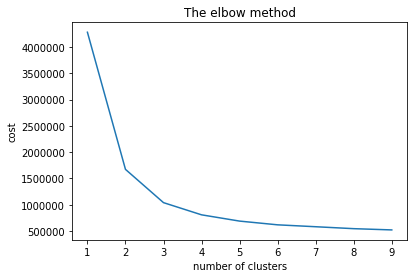

In [69]:
cost = []
for i in range(1,10):
    kproto = KPrototypes(n_clusters=i, init='Huang', n_jobs=-1, n_init=5) 
    kproto.fit(X_kp,categorical=dnumcolums)
    cost.append(kproto.cost_)
plt.plot(range(1,10), cost)
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('cost')

In [70]:
# chon so luong cluster
cluster_kp = 3

In [71]:
kproto = KPrototypes(n_clusters=cluster_kp, init='Huang', n_jobs=-1, n_init=5)
y_kp = kproto.fit_predict(X_kp,categorical=dnumcolums)

In [72]:
dataset['cluster_kp'] = y_kp

In [73]:
# group time finishing time thanh 3 nhom:
# nhom 1: < 200, nhom 2: 200-400, nhom 3: >400 
def finishing_time_group(time):
    if time < 200.0:
        return '<200'
    elif time >= 200.0 and time < 300.0:
        return '200-300'
    else:
        return '>300'
dataset['finish_time'] = dataset['official'].apply(finishing_time_group)

In [74]:
dataset['finish_time'].value_counts()

200-300    20512
<200        6405
>300        3507
Name: finish_time, dtype: int64

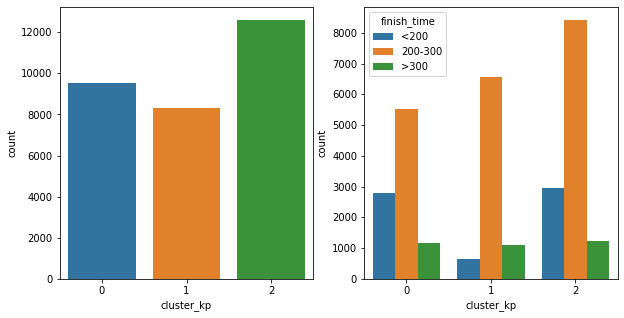

In [75]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(dataset['cluster_kp'])
plt.subplot(1, 2, 2)
sns.countplot(x='cluster_kp',hue='finish_time', data = dataset)

In [97]:
finish_time = pd.DataFrame(columns=['<200', '200-300','>300'])
finish_time.loc['cluster_0'] = dataset[dataset['cluster_kp']==0].groupby('finish_time').count()['cluster_kp']
finish_time.loc['cluster_1'] = dataset[dataset['cluster_kp']==1].groupby('finish_time').count()['cluster_kp']
finish_time.loc['cluster_2'] = dataset[dataset['cluster_kp']==2].groupby('finish_time').count()['cluster_kp']
finish_time

,<200,200-300,>300
cluster_0,2793,5536,1182
cluster_1,662,6561,1099
cluster_2,2950,8415,1226


### Nhan xet
- Cluster 2 co so luong nhieu nhat, cluster 1 co so luong it nhat
- Cluster 0,2 co nhieu nguoi chay nhanh nhat

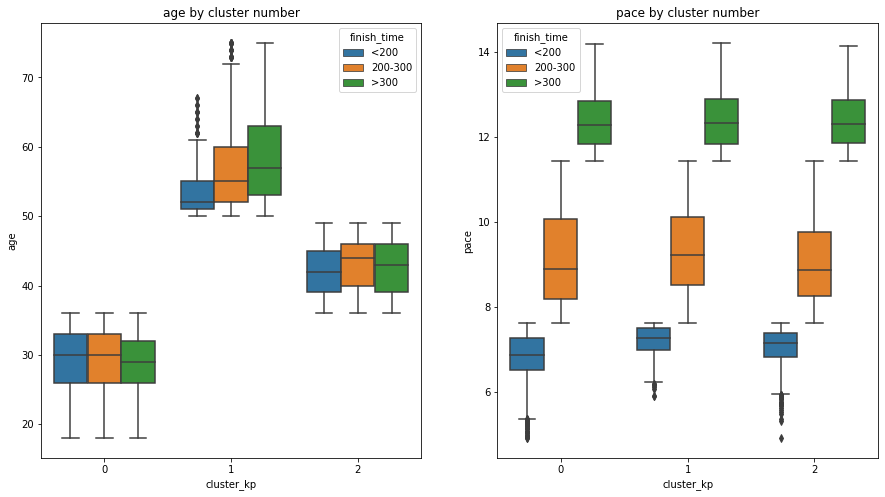

In [76]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='cluster_kp', y='age', hue='finish_time', data=dataset)
plt.title('{} by cluster number'.format('age'))
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_kp', y='pace', hue='finish_time', data=dataset)
plt.title('{} by cluster number'.format('pace'))
plt.show()

### Nhan xet
- Cluster 0 co do tuoi trung binh thap nhat, cluster 1 co do tuoi trung binh cao nhat. Tuong ung nhung nguoi tre thi chay nhanh hon so voi nhung lon tuoi

### Performance

In [77]:
le = preprocessing.LabelEncoder()
X_cat = X_cat.apply(le.fit_transform)

In [78]:
# caculating silhouette_score for K_modes
silscore_kp_modes = silhouette_score(X_cat, y_kp, metric='hamming')
print("For n_clusters = {}, silhouette score is {})".format(cluster_kp, silscore_kp_modes))

For n_clusters = 3, silhouette score is -0.02549856579658068)


In [79]:
# caculating silhouette_score for K_means
silscore_kp_means = silhouette_score(X_num, y_kp, metric='euclidean')
print("For n_clusters = {}, silhouette score is {})".format(cluster_kp, silscore_kp_means))

For n_clusters = 3, silhouette score is 0.5074680622751997)


In [80]:
silscore_kproto = (silscore_kp_modes + silscore_kp_means)/2
print("For n_clusters = {}, silhouette score of K-prototype is {})".format(cluster_kp, silscore_kproto))

For n_clusters = 3, silhouette score of K-prototype is 0.24098474823930952)
